In [3]:
import sys
sys.path.insert(0, '..')
sys.path.insert(0, '../..')


%load_ext autoreload
%autoreload 2

%matplotlib inline  

import matplotlib.pyplot as plt 
import numpy as np

from shared.nbs_helpers import draw_polys
from shapely.geometry import Polygon, MultiPolygon
from shapely.geometry.polygon import orient
from shapely.affinity import scale, rotate, translate

from PIL import Image, ImageFont, ImageDraw

from joblib import dump, load

from tqdm.autonotebook import tqdm

from shared.nbs_helpers import draw_polys, draw_clusters, InParallelWithBar
from shared.utils import np_to_shapely, shapely_to_np

from pathlib import Path
import h5py

sys.path.insert(0, '../SynthText')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Debut input db

In [17]:
root = Path('~/data/tx/sythtext').expanduser()

In [16]:
import pickle as cp

with open(root/'imnames.cp', 'rb') as f:
    filtered_imnames = set(pickle.load(f))
    
filtered_imnames

{'kathmandu_102.jpg',
 'asphalt_66.jpg',
 'ballet_53.jpg',
 'farm_4.jpg',
 'net_9.jpg',
 'mesh_59.jpg',
 'dog_124.jpg',
 'wall_66.jpg',
 'clouds_26.jpg',
 'wall_58.jpg',
 'roti_50.jpg',
 'empty+street_121.jpg',
 'road_74.jpg',
 'rain_37.jpg',
 'batman_132.jpg',
 'warehouse_138.jpg',
 'turtles_128.jpg',
 'clothes_48.jpg',
 'crater_121.jpg',
 'mouth+of+a+river_68.jpg',
 'san+diego_98.jpg',
 'aquarium_73.jpg',
 'coal_122.jpg',
 'house+cat_101.jpg',
 'oxford_95.jpg',
 'rajasthan_143.jpg',
 'clothes_7.png',
 'crater_18.jpg',
 'kathak_14.jpg',
 'planet_15.jpg',
 'stage_50.jpg',
 'concert_38.jpg',
 'warehouse_56.jpg',
 'oxford_94.jpg',
 'baroque_56.jpg',
 'pottery_29.jpg',
 'texture_19.jpg',
 'warehouse_70.jpg',
 'zebra_15.jpg',
 'aquarium_128.jpg',
 'jaipur_131.jpg',
 'bob+dylan_137.jpg',
 'dog_28.jpg',
 'ballet_102.jpg',
 'roti_116.jpg',
 'koala_67.jpg',
 'turtles_66.jpg',
 'bedroom_23.jpeg',
 'sandwich_102.jpg',
 'village_52.jpg',
 'stage_137.jpg',
 'maze_20.jpg',
 'kerala_52.jpg',
 'wall_

In [ ]:
im_dir = 'bg_img'
depth_db = h5py.File(root/'depth1.h5','r')
seg_db = h5py.File(root/'seg.h5','r')

# imnames = sorted(depth_db.keys())
list(depth_db.keys())



imnames = sorted(depth_db.keys())
    
fnames = [
    imname
        for imname in imnames
            if imname in filtered_imnames
]

In [40]:
len(fnames)

8010

In [48]:
!ls {root/im_dir} | cut -d_ -f 1 | sort -u 

ant+hill
aquarium
asphalt
ballet
baroque
batman
bay+area
bedroom
berkeley
birds
bob+dylan
building
cambridge
camping
chocolate
city
city+skyline
clothes
clouds
coal
coffee
concert
cows
crater
cream
delhi
desert
dog
dubai+dera
eagle
empty+street
eric+clapton
farm
farmer
flowers
fruits
hedge
hiking
hill
horse
house+cat
hubble
images
indian+musicians
jaipur
jogging
kathak
kathmandu
kerala
kite
koala
leather
leopard
lion
living+room
lobby+hotel
maze
mesh
monuments
mouth+of+a+river
museums+in+london
net
newton
night
nile
oxford
park
peacock
person
photos
places
planet
pottery
punting
rain
rajasthan
resort
richard+feynman
road
roti
san+diego
sandwich
sea
silk
stage
stanford+cathedral
steel
street
student
study+room
sun
swan
swimming
tennis
texture
traffic
tree+trunk
turtles
tyres
van+gogh
village
vintage+cars
wall
war
warehouse
window
woollens
wozniak
zebra
zoo


In [23]:
imname = 'places_112.jpg'

seg = seg_db['mask'][imname][:].astype('float32')
area = seg_db['mask'][imname].attrs['area']
label = seg_db['mask'][imname].attrs['label']

depth = depth_db[imname][:].T
depth = depth[:,:,0]

In [ ]:
for imname in imnames:
    # ignore if not in filetered list:
    if imname not in filtered_imnames: continue

    # get the colour image:
    img = Image.open(osp.join(im_dir, imname)).convert('RGB')

    # get depth:
    depth = depth_db[imname][:].T
    depth = depth[:,:,0]

    # get segmentation info:
    seg = seg_db['mask'][imname][:].astype('float32')
    area = seg_db['mask'][imname].attrs['area']
    label = seg_db['mask'][imname].attrs['label']

    # re-size uniformly:
    sz = depth.shape[:2][::-1]
    img = np.array(img.resize(sz,Image.ANTIALIAS))
    seg = np.array(Image.fromarray(seg).resize(sz,Image.NEAREST))
  
  # see `gen.py` for how to use img, depth, seg, area, label for further processing.
  #    https://github.com/ankush-me/SynthText/blob/master/gen.py

# Debug output db

In [ ]:
db = Path('~/data/tx/sythtext-results/SynthText.h5').expanduser()

db = h5py.File(db,'r')

db.keys()

sorted(db['data'].keys())

In [37]:
db.close()

In [4]:
!ls -lh ~/data/tx/sythtext-results/SynthText2.h5

total 17G
-rw-r--r-- 1 anerinovsky __USERS__ 17G апр 30 16:33 SynthText2.h5
-rw-r--r-- 1 anerinovsky __USERS__   0 апр 29 19:55 SynthText.h5


In [4]:
db = Path('~/data/tx/sythtext-results/SynthText2.h5').expanduser()
db = h5py.File(db,'r')

In [ ]:
!ls ~/data/tx/sythtext-results/

In [5]:
ks = sorted(db['data'].keys())
len(ks), ks[:10]

(23961,
 ['ant+hill_10.jpg_orig_0',
  'ant+hill_10.jpg_rnd_0',
  'ant+hill_10.jpg_wbg_0',
  'ant+hill_100.png_orig_0',
  'ant+hill_100.png_rnd_0',
  'ant+hill_100.png_wbg_0',
  'ant+hill_102.jpg_orig_0',
  'ant+hill_102.jpg_rnd_0',
  'ant+hill_102.jpg_wbg_0',
  'ant+hill_106.jpg_orig_0'])

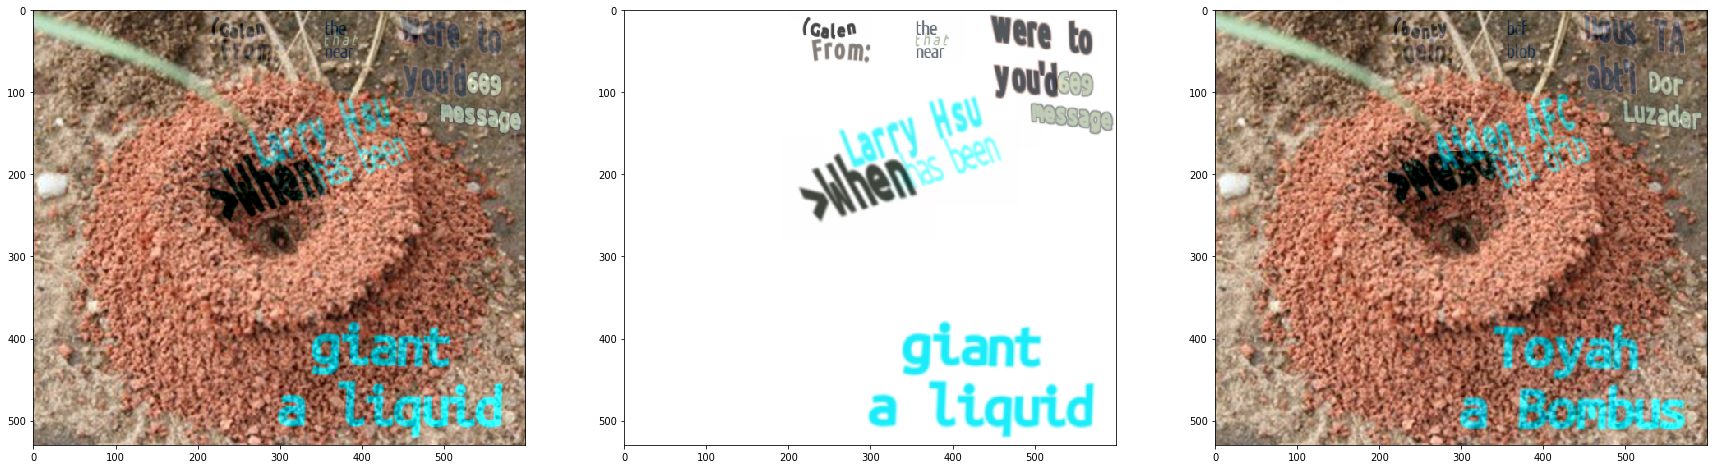

In [10]:

plt.figure(figsize=(30, 10))

plt.subplot(131)
plt.imshow(np.array(db['data']['ant+hill_10.jpg_orig_0']))
plt.subplot(132)
plt.imshow(np.array(db['data']['ant+hill_10.jpg_wbg_0']))
plt.subplot(133)
plt.imshow(np.array(db['data']['ant+hill_10.jpg_rnd_0']))


In [ ]:
from skimage.feature import canny


from skimage.color import rgb2gray
plt.figure(figsize=(10, 10))
plt.imshow(canny(rgb2gray(np.array(db['data']['ant+hill_10.jpg_wbg_0'])), sigma=.5))
